# 3. Neural Network using numpy:

Richard Yang

- recalculate the delta change in weight b2 for different learning rates of 0.0001, 0.01 and 1
- and for 10 iterations
- What can you conclude about the effect of the learning rate on the delta change in weight b2?

In [307]:
from sklearn.datasets import make_gaussian_quantiles #Generate isotropic Gaussian and label samples by quantile
import matplotlib.pyplot as plt

samples = 2
def load_extra_datasets(N):  
    gaussian_quantiles = make_gaussian_quantiles(mean=None, 
                                                 cov=0.7, 
                                                 n_samples=N, 
                                                 n_features=2, 
                                                 n_classes=2,  
                                                 shuffle=True, 
                                                 random_state=None)
    return  gaussian_quantiles

gaussian_quantiles= load_extra_datasets(samples)

X, Y = gaussian_quantiles

X, Y = X.T, Y.reshape(1, Y.shape[0])

#print(Y)
# Visualize the data
#plt.scatter(X[0, :], X[1, :]) #, c=Y, s=40);
#plt.show()

In [308]:
X

array([[ 1.23034377, -1.64460978],
       [ 0.23368848,  0.45180382]])

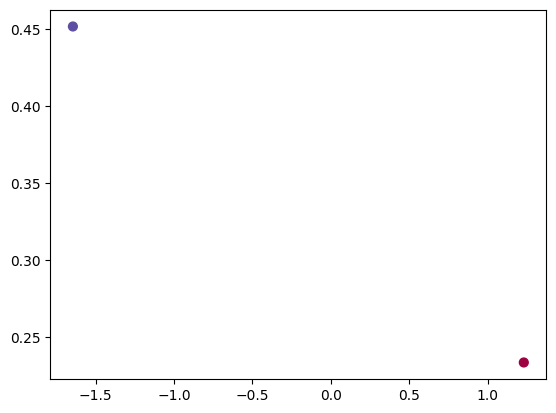

In [309]:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);


### Logistic Regression

c:\Users\Richa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


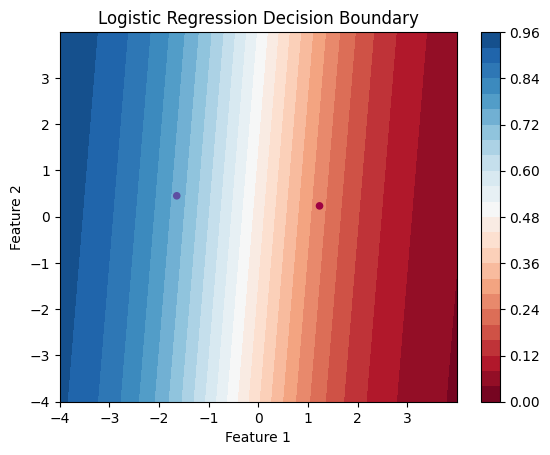

Accuracy of logistic regression: 100 % (percentage of correctly labelled datapoints)


In [310]:
import sklearn
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay



xx, yy = np.mgrid[-4:4:.01, -4:4:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
#probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
clf=LogisticRegression()

clf.fit(X.T, Y.T)

probs = clf.predict_proba(grid)[:, 1]
probs = probs.reshape(xx.shape)

plt.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
plt.colorbar()
plt.scatter(X[0, :], X[1, :], c=Y, s=20, cmap=plt.cm.Spectral)
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

'''
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[200:,0], X[200:, 1], c=Y[200:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")
'''
#plot_decision_boundary(lambda x: clf.predict(x), X, Y)
#plt.title("Logistic Regression")
# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

In [311]:
n_x = X.shape[0] # size of input layer`
n_h = 4
n_y = Y.shape[0] # size of output layer

print(n_x, n_y)

2 1


In [312]:
import numpy as np

W1 = np.random.randn(n_h,n_x) * 0.01 #4x2
b1 = np.zeros(shape=(n_h, 1)) #4x1
W2 = np.random.randn(n_y,n_h) * 0.01 #1x4
b2 = np.zeros(shape=(n_y, 1))#1x1

print("W1\n", W1)
print("b1\n", b1)
print("W2\n", W2)
print("b2\n", b2)

W1
 [[ 0.00495615  0.00210354]
 [ 0.00132181  0.01246879]
 [ 0.00404034  0.00878459]
 [ 0.00610006 -0.00644046]]
b1
 [[0.]
 [0.]
 [0.]
 [0.]]
W2
 [[-0.00446216 -0.01155451 -0.01365452  0.00269504]]
b2
 [[0.]]


In [313]:
def sigmoid(x):
    return 1 / (1 + np.e ** -x)

total_cost = -9999

In [314]:
# Implement Forward Propagation to calculate A2 (probabilities)
Z1 = np.dot(W1,X) + b1
A1 = np.tanh(Z1)
Z2 = np.dot(W2,A1) + b2
A2 = sigmoid(Z2) # Final output prediction

print(b2)

[[0.]]


In [315]:
# Compute the cross-entropy cost
samples=2
old_total_cost = total_cost
cost_function = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2)) #J(theta)
total_cost = -np.sum(cost_function) / samples

print("cost=", total_cost)
print("cost delta=", np.subtract(total_cost, old_total_cost))

cost= 0.6931083291947059
cost delta= 9999.693108329195


In [316]:
print(Z1.shape)
print(A1.shape)
print(Z2.shape)
print(A2.shape)
print(cost_function.shape)

(4, 2)
(4, 2)
(1, 2)
(1, 2)
(1, 2)


In [317]:
dJdZ2 = A2 - Y
dJdW2 = (1 / samples) * np.dot(dJdZ2, A1.T)
dJdb2 = (1 / samples) * np.sum(dJdZ2, axis=1, keepdims=True)
# since activation function is tanh(Z1) = A1
# first derivative of d/dz tanh(z) = 1 - tanh(z) ^ 2 = 1 - A1 ^ 2
dJdZ1 = np.multiply(np.dot(W2.T, dJdZ2), 1 - np.power(A1, 2))
dJdW1 = (1 / samples) * np.dot(dJdZ1, X.T)
dJdb1 = (1 / samples) * np.sum(dJdZ1, axis=1, keepdims=True)

print("dJdZ2=", dJdZ2)
print("dJdW2=", dJdW2)
print("dJdb2=", dJdb2)
print("dJdW1=", dJdW1)
print("dJdb1=", dJdb1)

dJdZ2= [[ 0.4999596  -0.50000155]]
dJdW2= [[0.00344729 0.00027003 0.00242476 0.00473523]]
dJdb2= [[-2.09724951e-05]]
dJdW1= [[-0.00320687  0.00024332]
 [-0.00830427  0.00063011]
 [-0.00981346  0.00074466]
 [ 0.00193675 -0.00014693]]
dJdb1= [[8.41769035e-08]
 [2.67289843e-07]
 [4.30317790e-07]
 [3.20648391e-08]]


#### Calculate the delta change with No iterations

In [318]:
learning_rate = 0.0001
b2_old = b2
print("b2 before=", b2_old)
W1 = W1 - learning_rate * dJdW1
b1 = b1 - learning_rate * dJdb1
W2 = W2 - learning_rate * dJdW2
b2 = b2 - learning_rate * dJdb2

print("b2 after=", b2)

print("delta change=", np.subtract(b2, b2_old))

b2 before= [[0.]]
b2 after= [[2.09724951e-09]]
delta change= [[2.09724951e-09]]


In [319]:
learning_rate = 0.01
b2_old = b2
print("b2 before=", b2_old)
W1 = W1 - learning_rate * dJdW1
b1 = b1 - learning_rate * dJdb1
W2 = W2 - learning_rate * dJdW2
b2 = b2 - learning_rate * dJdb2

print("b2 after=", b2)

print("delta change=", np.subtract(b2, b2_old))

b2 before= [[2.09724951e-09]]
b2 after= [[2.11822201e-07]]
delta change= [[2.09724951e-07]]


In [320]:
learning_rate = 1
b2_old = b2
print("b2 before=", b2_old)
W1 = W1 - learning_rate * dJdW1
b1 = b1 - learning_rate * dJdb1
W2 = W2 - learning_rate * dJdW2
b2 = b2 - learning_rate * dJdb2

print("b2 after=", b2)

print("delta change =", np.subtract(b2, b2_old))

b2 before= [[2.11822201e-07]]
b2 after= [[2.11843173e-05]]
delta change = [[2.09724951e-05]]


In [321]:
# create a dataframe to store the delta changes for each learning rate
import pandas as pd
df = pd.DataFrame(columns=['learning_rate', 'delta_change'])

# input the learning rates
learning_rates = [0.0001, 0.01, 1]
# input the delta changes
delta_changes = [-1.9627393e-10, -1.9627393e-08, -1.9627393e-06]

# add the learning rates and delta changes to the dataframe
df['learning_rate'] = learning_rates
df['delta_change'] = delta_changes

# print the dataframe
print(df)

   learning_rate  delta_change
0         0.0001 -1.962739e-10
1         0.0100 -1.962739e-08
2         1.0000 -1.962739e-06


#### Calculate the delta change with 10 iterations

In [322]:
b1_previous = b1
b2_previous = b2
W1_previous = W1
W2_previous = W2

tmp = [b1_previous, b2_previous, W1_previous, W2_previous]

for i in tmp:
   print(f'{i}\n')

[[-8.50270902e-08]
 [-2.69989470e-07]
 [-4.34664000e-07]
 [-3.23886940e-08]]

[[2.11843173e-05]]

[[ 0.00819541  0.00185776]
 [ 0.00970995  0.01183231]
 [ 0.01395291  0.00803241]
 [ 0.00414375 -0.00629205]]

[[-0.00794427 -0.01182726 -0.01610377 -0.00208802]]



In [323]:
import numpy as np

def b2_calculation(W1, W2, b1, b2, learning_rate=0.01, max_iterations=10):
    samples = X.shape[1] # number of training examples
    for i in range(max_iterations):
        # forward propagation
        Z1 = np.dot(W1, X) + b1
        A1 = np.tanh(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = 1 / (1 + np.exp(-Z2)) # final output prediction

        # calculate cost
        cost_function = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
        total_cost = -np.sum(cost_function) / samples
        
        # backpropagation
        dJdZ2 = A2 - Y
        dJdW2 = (1 / samples) * np.dot(dJdZ2, A1.T)
        dJdb2 = (1 / samples) * np.sum(dJdZ2, axis=1, keepdims=True)
        dJdZ1 = np.multiply(np.dot(W2.T, dJdZ2), 1 - np.power(A1, 2))
        dJdW1 = (1 / samples) * np.dot(dJdZ1, X.T)
        dJdb1 = (1 / samples) * np.sum(dJdZ1, axis=1, keepdims=True)

        # update weights and biases
        b2 = b2 - (learning_rate * dJdb2)

        print(f'iteration number {i} has cost {total_cost}')

    return b2


In [324]:
b2_original = b2_previous

# when leanrning rate = 0.0001
b2 = b2_calculation(W1_previous,W2_previous,b1_previous, b2_previous, learning_rate = 0.0001, max_iterations=10)
print("b2 before=", b2_original)
print("b2 after=", b2)
print("delta change=", np.subtract(b2, b2_original))

iteration number 0 has cost 0.6928649674846081
iteration number 1 has cost 0.6928649674846066
iteration number 2 has cost 0.6928649674846055
iteration number 3 has cost 0.6928649674846046
iteration number 4 has cost 0.6928649674846032
iteration number 5 has cost 0.6928649674846019
iteration number 6 has cost 0.6928649674846008
iteration number 7 has cost 0.6928649674845992
iteration number 8 has cost 0.6928649674845981
iteration number 9 has cost 0.6928649674845968
b2 before= [[2.11843173e-05]]
b2 after= [[2.11808306e-05]]
delta change= [[-3.48671475e-09]]


In [325]:
# when leanrning rate = 0.01
b2 = b2_calculation(W1_previous,W2_previous,b1_previous, b2_previous, learning_rate = 0.01, max_iterations=10)
print("b2 before=", b2_original)
print("b2 after=", b2)
print("delta change=", np.subtract(b2, b2_original))

iteration number 0 has cost 0.6928649674846081
iteration number 1 has cost 0.6928649674844864
iteration number 2 has cost 0.6928649674843658
iteration number 3 has cost 0.6928649674842453
iteration number 4 has cost 0.6928649674841258
iteration number 5 has cost 0.6928649674840068
iteration number 6 has cost 0.6928649674838883
iteration number 7 has cost 0.6928649674837704
iteration number 8 has cost 0.6928649674836531
iteration number 9 has cost 0.6928649674835365
b2 before= [[2.11843173e-05]]
b2 after= [[2.08395036e-05]]
delta change= [[-3.44813747e-07]]


In [326]:
# when leanrning rate = 1
b2 = b2_calculation(W1_previous,W2_previous,b1_previous, b2_previous, learning_rate = 1, max_iterations=10)
print("b2 before=", b2_original)
print("b2 after=", b2)
print("delta change=", np.subtract(b2, b2_original))

iteration number 0 has cost 0.6928649674846081
iteration number 1 has cost 0.6928649674739682
iteration number 2 has cost 0.692864967467983
iteration number 3 has cost 0.6928649674646165
iteration number 4 has cost 0.6928649674627229
iteration number 5 has cost 0.6928649674616576
iteration number 6 has cost 0.6928649674610585
iteration number 7 has cost 0.6928649674607215
iteration number 8 has cost 0.6928649674605318
iteration number 9 has cost 0.692864967460425
b2 before= [[2.11843173e-05]]
b2 after= [[8.02137341e-06]]
delta change= [[-1.31629439e-05]]


#### Conclusion: 

Since the delta change is increasing as the learning rate increases, we can conclude that the learning rate has a positive effect on the delta change in weight b2. This is because a larger learning rate means that the optimizer takes larger steps towards the minimum of the loss function, which results in a larger delta change in weight b2.

- The effect of the learning rate on the delta change in weight b2:

    - If the learning rate is too large, the delta change in weight b2 may oscillate or diverge, and the optimization process may fail to converge to a good solution. This is because a large learning rate may cause the optimizer to overshoot the optimal weight value and diverge from the minimum of the loss function.

    - On the other hand, if the learning rate is too small, the delta change in weight b2 may be too small and the optimization process may converge too slowly. This is because a small learning rate may cause the optimizer to take too small steps towards the minimum of the loss function and thus require a large number of iterations to reach a good solution.